https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe/notebook

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [27]:
data = pd.read_csv('CarPrice_Assignment.csv')
df = data.copy()

<h1>Data Understanding

In [28]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<h1>Data Preparation

In [31]:
df.drop('car_ID', axis = 1, inplace = True)

In [32]:
for i in df.select_dtypes(include = 'object'):
    print(df[i].unique())

['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'buick skyhawk' 'buick opel isuzu 

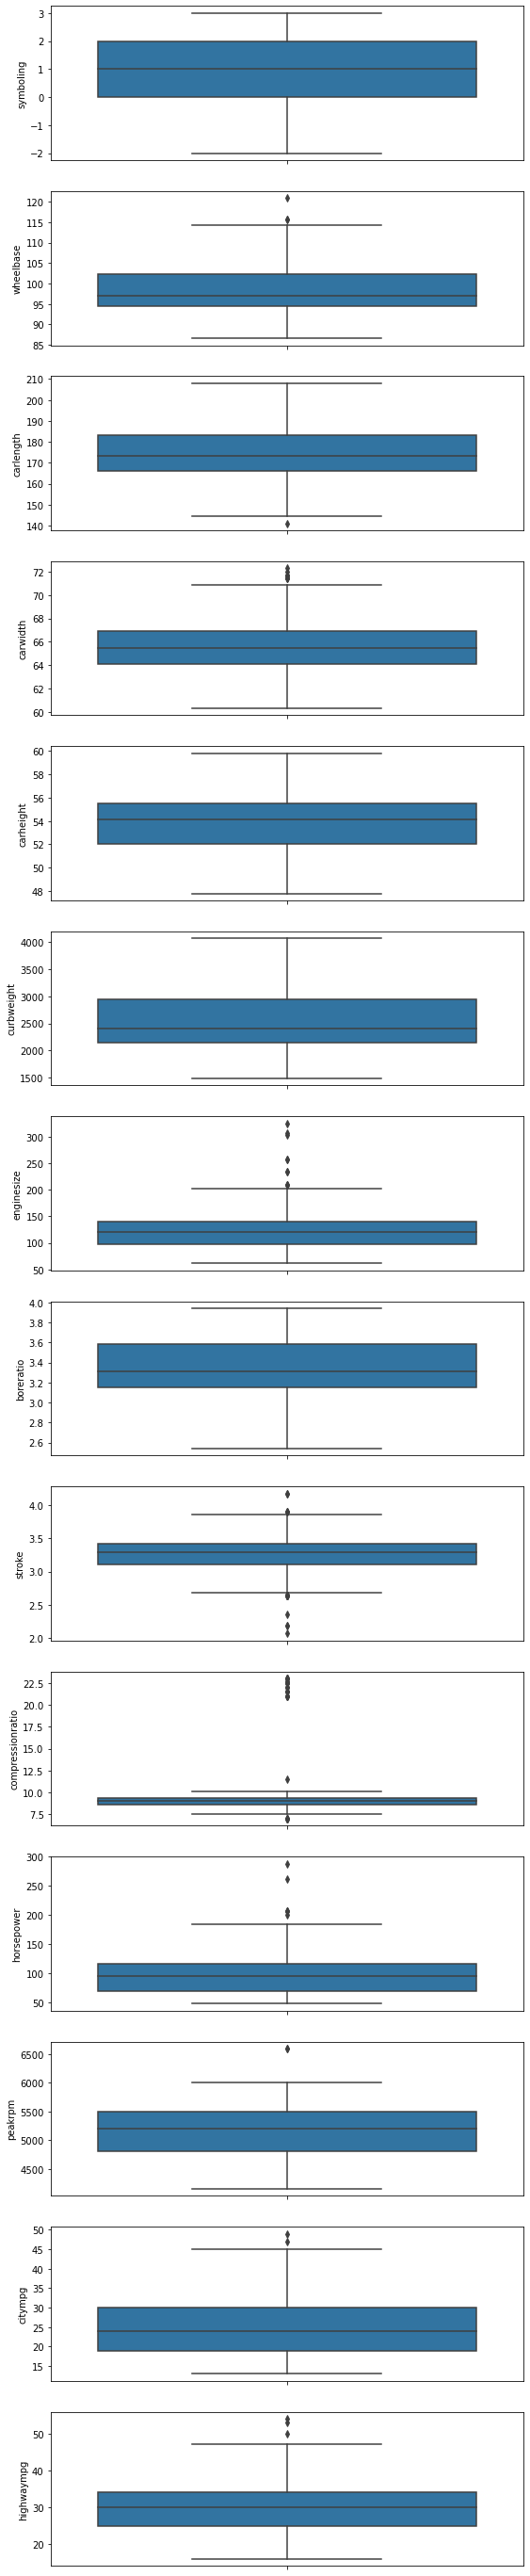

In [33]:
columns_name = df.select_dtypes(exclude = 'object').columns[:-1]
fig, axes = plt.subplots(nrows=len(columns_name), figsize=(9, 50))
for i in range(len(columns_name)):
   
    sns.boxplot(ax=axes[i], y=columns_name[i], data=df)

In [34]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [35]:
for col in columns_name:
    
    lowerbound,upperbound = outlier_treatment(df[col])
    df[col]=np.clip(df[col],a_min=lowerbound,a_max=upperbound)

In [36]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450.0


<AxesSubplot:xlabel='symboling', ylabel='price'>

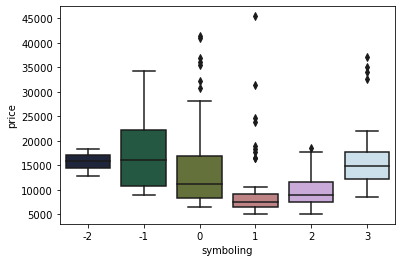

In [37]:
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

<AxesSubplot:>

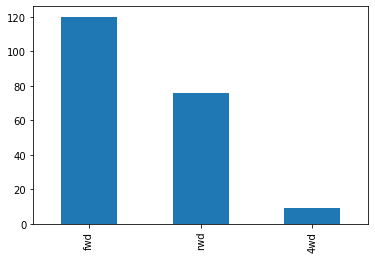

In [38]:
arr = ['fueltype', 'doornumber', 'drivewheel']

plt1 = df.drivewheel.value_counts()
plt1.plot(kind = 'bar')

In [8]:
# remove car name
df.drop('CarName', axis = 1, inplace = True)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

C:\Users\user\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


             feature         VIF
0          symboling   25.341833
1          wheelbase   93.081187
2          carlength  129.968970
3           carwidth   70.232067
4          carheight   73.147650
..               ...         ...
184   fuelsystem_idi         inf
185   fuelsystem_mfi         inf
186  fuelsystem_mpfi  267.427022
187  fuelsystem_spdi   82.508496
188  fuelsystem_spfi   12.504790

[189 rows x 2 columns]


In [41]:
df = pd.get_dummies(df, columns = df.select_dtypes(include = 'object').columns, drop_first=True)

<h1>Modelling

In [42]:
y = df.price
X = df.drop('price', axis = 1)

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [34]:
lin_reg.score(X_train, y_train)

0.9464233351736416

In [35]:
lin_reg.score(X_test, y_test)

0.8308334829450936

In [36]:
y_pred = lin_reg.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test, y_pred)

print("R2:", R2)

n = X_test.shape[0] #sample size
p = X_test.shape[1] #number of predictors

print("Adjusted R2:", 1 - (1-R2)*(n-1)/(n-1-p))

from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)
print("MAE:", MAE)

R2: 0.8308334829450936
Adjusted R2: 3.255553560732085
MAE: 2363.4896865440996


<h1>Pro Modelling

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [19]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 19),
 ('wheelbase', False, 21),
 ('carlength', False, 28),
 ('carwidth', False, 5),
 ('carheight', False, 31),
 ('curbweight', False, 30),
 ('enginesize', False, 23),
 ('boreratio', False, 14),
 ('stroke', False, 20),
 ('compressionratio', False, 9),
 ('horsepower', False, 29),
 ('peakrpm', False, 32),
 ('citympg', False, 24),
 ('highwaympg', False, 26),
 ('fueltype_gas', False, 8),
 ('aspiration_turbo', False, 16),
 ('doornumber_two', False, 18),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', False, 4),
 ('carbody_wagon', False, 2),
 ('drivewheel_fwd', False, 22),
 ('drivewheel_rwd', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 33),
 ('enginetype_l', False, 3),
 ('enginetype_ohc', False, 15),
 ('enginetype_ohcf', False, 27),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 25),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylin

In [20]:
X_train.columns[rfe.support_]

Index(['carbody_hardtop', 'carbody_hatchback', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_two',
       'fuelsystem_4bbl'],
      dtype='object')

In [21]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,carbody_hardtop,carbody_hatchback,drivewheel_rwd,enginelocation_rear,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_4bbl
4,0,0,0,0,0,1,0,0,0,0
71,0,0,1,0,1,0,0,0,0,0
134,0,1,0,0,0,0,1,0,0,0
145,0,0,0,0,0,0,1,0,0,0
122,0,0,0,0,0,0,1,0,0,0


In [22]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [23]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     73.22
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           3.66e-53
Time:                        21:07:43   Log-Likelihood:                -1557.4
No. Observations:                 164   AIC:                             3137.
Df Residuals:                     153   BIC:                             3171.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.712e+04   2

In [25]:
checkVIF(X_train_new)

,Features,VIF
0,const,94.51
7,cylindernumber_four,15.61
8,cylindernumber_six,6.78
6,cylindernumber_five,5.59
9,cylindernumber_two,4.59
10,fuelsystem_4bbl,2.96
5,enginetype_ohcv,2.69
4,enginelocation_rear,1.61
3,drivewheel_rwd,1.39
1,carbody_hardtop,1.33
